In [3]:
import pandas as pd

## Reading csv using read_csv()

In [4]:
pd.read_csv('drinks.csv')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [5]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [6]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','wine_servings'], index_col='country')

In [7]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [8]:
# read_csv always returns a DataFrame
type(alcohol)

pandas.core.frame.DataFrame

In [9]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','wine_servings'], index_col='country', squeeze=True)

/var/folders/qc/75tc8zq51_zgncdtzy296p400000gn/T/ipykernel_5908/2718278490.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','wine_servings'], index_col='country', squeeze=True)


In [10]:
# squeeze = True squeezes the DataFrame to Series
type(alcohol)

pandas.core.series.Series

## Series Sizing with .size, .shape and len()

In [11]:
alcohol.size # number of elements in series

193

In [12]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [13]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [14]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [15]:
alcohol.shape # returns tuple of dimension of series

(193,)

In [16]:
alcohol.size == alcohol.shape[0]

True

In [17]:
len(alcohol)

193

## Unique Values and Series Monotonicity

In [18]:
alcohol.is_unique

False

In [19]:
alcohol.head().is_unique

True

In [20]:
alcohol.nunique() #number of uniques in the series

71

In [21]:
alcohol.nunique(dropna=False) #includes NA as well

72

In [22]:
# monotonicity - monotonic series are either increasing or decreasing series

In [23]:
pd.Series([1,2,3,4,5]).is_monotonic

True

In [24]:
pd.Series([1,3,3,3,3,4]).is_monotonic

True

In [25]:
pd.Series([1,3,3,3,4,9,2]).is_monotonic

False

In [26]:
pd.Series([1,3,3,3,3,4]).is_monotonic_increasing

True

In [27]:
pd.Series([5,4,3,2,2,1]).is_monotonic_decreasing

True

In [28]:
pd.Series([5,4,3,2,2,4]).is_monotonic_decreasing

False

## count() method

In [29]:
alcohol.count() # returns the count of not empty values

162

In [30]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [31]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [32]:
len(list(alcohol[alcohol.isnull()].index))

31

In [33]:
alcohol.isnull().sum()

31

## notnull() and notna()

In [34]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [35]:
alcohol[alcohol.notnull()].size

162

## Boolean as Integers

In [36]:
True + 19

20

In [37]:
True + True - False + True * 3

5

In [38]:
type(True)

bool

In [39]:
type(False)

bool

In [40]:
bool.__mro__

(bool, int, object)

In [41]:
type(True + True)

int

## Dropping and Filling NAs

In [42]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [43]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [44]:
# alcohol = alcohol.dropna() dropna() will return a copy of original series

In [45]:
# alcohol.dropna(inplace=True) dropna() will modify the original series

In [46]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [47]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## Descriptive Statistics

In [48]:
alcohol.sum()

8221.0

In [49]:
alcohol.mean()

50.74691358024691

In [50]:
alcohol.median()

11.5

In [51]:
alcohol.quantile(.5) #50th quantile is same as median

11.5

<AxesSubplot:>

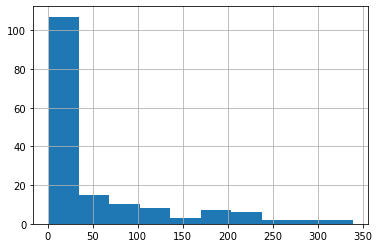

In [52]:
alcohol.hist() #Right skewed, mean will be more than median 

In [53]:
# IQR

In [54]:
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [55]:
iqr

58.25

In [56]:
alcohol.min()

1.0

In [57]:
alcohol.max()

339.0

In [58]:
# standard deviation

In [59]:
alcohol.std()

76.13491716376173

In [60]:
# variance

In [61]:
alcohol.var()

5796.52561153286

## describe()

In [62]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

## mode() and value_counts()

In [76]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [79]:
alcohol[alcohol==1.0].size

28

In [80]:
# value counts - frequency table

In [83]:
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [84]:
alcohol.value_counts().iloc[0]

28

In [87]:
# Relative percentage of frequency

alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

## sort_values()

In [89]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [92]:
# Descending order
alcohol.sort_values(ascending=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [93]:
# NaN at top
alcohol.sort_values(ascending=False, na_position='first')

country
Afghanistan                 NaN
Bangladesh                  NaN
Bhutan                      NaN
Burundi                     NaN
North Korea                 NaN
                           ... 
Jordan                      1.0
Solomon Islands             1.0
Central African Republic    1.0
Haiti                       1.0
Chad                        1.0
Name: wine_servings, Length: 193, dtype: float64

In [95]:
# Specify sorting algorithm - default is quicksort
alcohol.sort_values(ascending=False, na_position='last', kind='mergesort')

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [96]:
alcohol.sort_values(ascending=False, na_position='last', kind='heapsort')

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [97]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

## nlargest() and nsmallest()

In [100]:
# 10 largest countries
alcohol.nlargest(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [101]:
# 10 smallest countries
alcohol.nsmallest(10)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Name: wine_servings, dtype: float64

## Sorting with sort_index()

In [103]:
alcohol.sort_index(ascending=False)

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

## Series arithmetics and fill_value()

In [104]:
alcohol + 2

country
Afghanistan      NaN
Albania         56.0
Algeria         16.0
Andorra        314.0
Angola          47.0
               ...  
Venezuela        5.0
Vietnam          3.0
Yemen            NaN
Zambia           6.0
Zimbabwe         6.0
Name: wine_servings, Length: 193, dtype: float64

In [105]:
(alcohol - 10)*2

country
Afghanistan      NaN
Albania         88.0
Algeria          8.0
Andorra        604.0
Angola          70.0
               ...  
Venezuela      -14.0
Vietnam        -18.0
Yemen            NaN
Zambia         -12.0
Zimbabwe       -12.0
Name: wine_servings, Length: 193, dtype: float64

In [106]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [109]:
more_drinks = pd.Series({'Albania':6, 'Algeria':10})

In [110]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [112]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan      NaN
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [113]:
# alcohol.subtract(), alcohol.subtract(), alcohol.divide()

## Series Iteration

In [114]:
mini_alc = alcohol[:10]

In [115]:
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [116]:
for i in mini_alc:
    print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [118]:
print(*mini_alc, sep = '\n')

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [119]:
for i in mini_alc.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [120]:
print(*mini_alc.index, sep = '\n')

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [121]:
for i in mini_alc.index:
    print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [125]:
for i in mini_alc.items():
    print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


## filter(), where() and mask()

In [130]:
#Starting with V
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [134]:
# filter() filter the series by index and not values
alcohol.filter(like='stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [135]:
#filtering by values
alcohol[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [136]:
def gt200(x):
    return x>200

In [137]:
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [138]:
# where() method - used to replace values where given condition is False

In [139]:
alcohol.where(lambda x: x>200, other='too small')

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [141]:
# mask() method - replaces where values are true

In [145]:
alcohol.mask(lambda x: x>200, other='too big')

country
Afghanistan        NaN
Albania           54.0
Algeria           14.0
Andorra        too big
Angola            45.0
                ...   
Venezuela          3.0
Vietnam            1.0
Yemen              NaN
Zambia             4.0
Zimbabwe           4.0
Name: wine_servings, Length: 193, dtype: object

## update(), apply()

In [152]:
# update() method

In [153]:
alcohol.update(pd.Series(data=[200,20], index=['Albania','Algeria']))

In [154]:
alcohol.head(10)

country
Afghanistan            NaN
Albania              200.0
Algeria               20.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [155]:
# apply() method

In [158]:
alcohol.apply(lambda x: x+2)

country
Afghanistan      NaN
Albania        202.0
Algeria         22.0
Andorra        314.0
Angola          47.0
               ...  
Venezuela        5.0
Vietnam          3.0
Yemen            NaN
Zambia           6.0
Zimbabwe         6.0
Name: wine_servings, Length: 193, dtype: float64

In [157]:
alcohol.head(10)

country
Afghanistan            NaN
Albania              200.0
Algeria               20.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [166]:
# Custom Callable
def multiply_by_self_with_min(x, min_servings):
    if x<min_servings:
        return x**2
    return x

In [167]:
alcohol.apply(multiply_by_self_with_min, args=(200,))

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [168]:
alcohol.apply(multiply_by_self_with_min, min_servings = 200)

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64